## Model a structural connectome

This tutorial will demonstrate how to generate a structural connectivity matrix $G$ using the [Normand *et al.* (2025)](https://www.biorxiv.org/content/10.1101/2025.09.17.676944v5) model,

$$
\displaystyle G_{ij}=\sum_{m=1}^k \frac{\psi_m(i)\psi_m^+(j)}{1+r_s^2\lambda_m},
$$

where:
- $G_{ij}$ denotes the connectivity strength between cortical vertices $i$ and $j$
- $\psi_m(i)$ denotes the amplitude of the $m^{th}$ geometric eigenmode at vertex $i$
- $\lambda_m$ denotes the $m^{th}$ eigenvalue
- $[\ \ ]^+$ denotes the Moore–Penrose pseudoinverse
- $r_s$ denotes the spatial length scale parameter
- $k$ denotes the number of modes used

As in the previous tutorials, we begin by initialising the EigenSolver with a cortical surface and medial wall mask, then solving for the first 120 eigenmodes. To reduce computation and plotting time, we can use the fsLR-4k mesh.

In [ ]:
from importlib.resources import files, as_file
from neuromodes import EigenSolver
from neuromodes.io import fetch_surf
from nsbutils.plotting import plot_surf, plot_heatmap
from nsbutils.utils import unmask

mesh, medmask = fetch_surf(density='4k', hemi='R')
solver = EigenSolver(mesh, mask=medmask).solve(120)

We can then call the `model_connectome` class method:

In [2]:
G = solver.model_connectome()

Note that $r_s=9.53$ and $k=108$ are used by default, in line with the paper.

We can visualise the structural connectivity matrix using `plot_heatmap`, from our `nsbutils`
 package:

<Axes: >

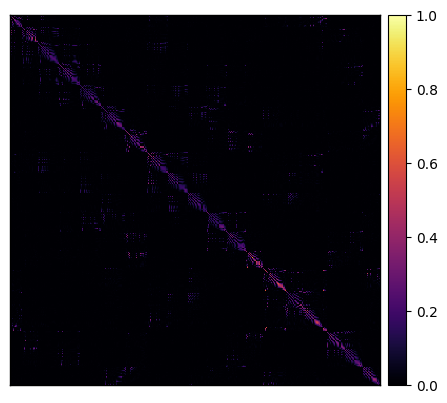

In [3]:
plot_heatmap(G, cmap='inferno', cbar=True)

We can also visualise the vertex-averaged connectivity on the cortical surface, this time using
 `plot_surf` from `nsbutils`:

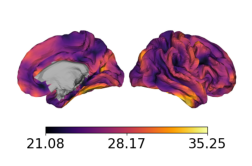

In [4]:
nodal_sc = G.sum(axis=0)

# Path to surface
rh_surfpath = files('neuromodes.data') / 'sp-human_tpl-fsLR_den-4k_hemi-R_midthickness.surf.gii'

with as_file(rh_surfpath) as rh_surfpath: 
    plot_surf(
        rh_surfpath,
        unmask(nodal_sc, medmask),
        cmap='inferno',
        cbar=True
    )

To explore the model further, we can generate another connectome but only use 5 modes instead of the default 108:

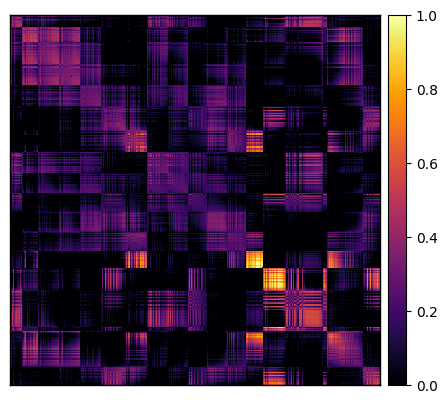

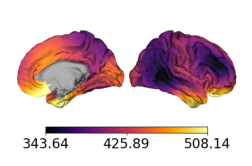

In [5]:
G_k5 = solver.model_connectome(k=5)

plot_heatmap(G_k5, cmap='inferno', cbar=True)

with as_file(rh_surfpath) as rh_surfpath: 
    plot_surf(
        rh_surfpath,
        unmask(G_k5.sum(axis=0), medmask),
        cmap='inferno',
        cbar=True
    )

What about if we instead increase the spatial length scale parameter from 9.53 to 95.3?

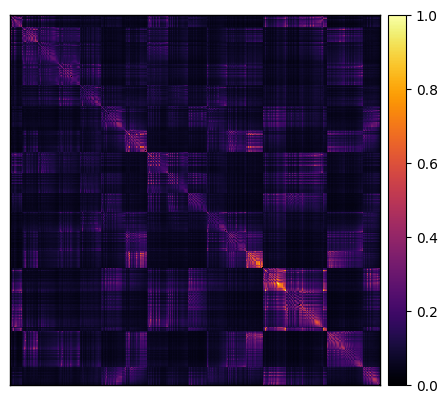

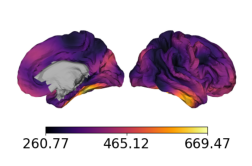

In [6]:
G_r95 = solver.model_connectome(r=95.3)

plot_heatmap(G_r95, cmap='inferno', cbar=True)

with as_file(rh_surfpath) as rh_surfpath: 
    plot_surf(
        rh_surfpath,
        unmask(G_r95.sum(axis=0), medmask),
        cmap='inferno',
        cbar=True
    )